# SCC-ICMC-USP 


# CURSO 2 - CD-AM-DM
# Exemplo 8 - SVM (SUPPORT VECTOR MACHINE), NB (NAIVE-BAYES) E KNN (K-NEAREST NEIGHBOUR) 
# Profa. Roseli A. F. Romero

---

### Objetivos:  COMPARAÇÃO DE DESEMPENHO DE DIFERENTES MÉTODOS DE AM
- USO DE 3 IMPORTANTES CLASSIFICADORES: SVM, NB E KNN
- USO DE DIFERENTES PARAMETRIZAÇÕES PARA CADA MÉTODO
- USO DA CURVA ROC 

---

### Questão 1.

Carregue o dataset Breast Cancer, faça uma análise de dados faltantes e separe o dataset em 75% treino e 25% teste:

In [2]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

# Carregando dados do sklearn:
dataset_sklearn = load_breast_cancer()
# Criando lista com nome das colunas:
nome_colunas = list(dataset_sklearn['feature_names'])+ ['target']
# Concatenando dados + alvo:
dados = np.c_[dataset_sklearn['data'], dataset_sklearn['target']]
# Criando dataframe:
dataset = pd.DataFrame(data=dados, columns=nome_colunas)
dataset

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


- Exploração inicial do conjunto:

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

- Verificando valores faltantes:

In [4]:
dataset.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

- Separando o conjunto:

In [5]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(dataset, test_size=0.25, random_state=0)

In [6]:
train_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
293,11.850,17.46,75.54,432.7,0.08372,0.05642,0.026880,0.022800,0.1875,0.05715,...,25.75,84.35,517.8,0.13690,0.17580,0.13160,0.09140,0.3101,0.07007,1.0
332,11.220,19.86,71.94,387.3,0.10540,0.06779,0.005006,0.007583,0.1940,0.06028,...,25.78,76.91,436.1,0.14240,0.09669,0.01335,0.02022,0.3292,0.06522,1.0
565,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.144000,0.097910,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,0.0
278,13.590,17.84,86.24,572.3,0.07948,0.04052,0.019970,0.012380,0.1573,0.05520,...,26.10,98.91,739.1,0.10500,0.07622,0.10600,0.05185,0.2335,0.06263,1.0
489,16.690,20.20,107.10,857.6,0.07497,0.07112,0.036490,0.023070,0.1846,0.05325,...,26.56,127.30,1084.0,0.10090,0.29200,0.24770,0.08737,0.4677,0.07623,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.080200,0.058430,0.1550,0.04996,...,24.30,129.00,1236.0,0.12430,0.11600,0.22100,0.12940,0.2567,0.05737,0.0
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,0.08243,...,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750,0.0
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.027100,0.014060,0.1506,0.06959,...,25.02,75.79,439.6,0.13330,0.10490,0.11440,0.05052,0.2454,0.08136,1.0
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.000000,0.000000,0.1653,0.06447,...,20.83,62.25,303.8,0.07117,0.02729,0.00000,0.00000,0.1909,0.06559,1.0


In [7]:
test_data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,0.11090,0.0
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788,1.0
439,14.02,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,0.06710,1.0
298,14.26,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,0.07676,1.0
37,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,23.21,26.97,153.50,1670.0,0.09509,0.16820,0.19500,0.12370,0.1909,0.06309,...,34.51,206.00,2944.0,0.14810,0.41260,0.58200,0.25930,0.3103,0.08677,0.0
113,10.51,20.19,68.64,334.2,0.11220,0.13030,0.06476,0.03068,0.1922,0.07782,...,22.75,72.62,374.4,0.13000,0.20490,0.12950,0.06136,0.2383,0.09026,1.0
527,12.34,12.27,78.94,468.5,0.09003,0.06307,0.02958,0.02647,0.1689,0.05808,...,19.27,87.22,564.9,0.12920,0.20740,0.17910,0.10700,0.3110,0.07592,1.0
76,13.53,10.94,87.91,559.2,0.12910,0.10470,0.06877,0.06556,0.2403,0.06641,...,12.49,91.36,605.5,0.14510,0.13790,0.08539,0.07407,0.2710,0.07191,1.0


### Questão 02.

Prepare os dados para treino, padronizando e dividindo-os em atributos e classes. Crie também uma estrutura do tipo dicionário que armazene nome de modelos, acurácias, recall e área sob curva roc.

In [8]:
from sklearn.preprocessing import StandardScaler

X_train, y_train = train_data.drop(['target'], axis=1), train_data['target']
X_test, y_test = test_data.drop(['target'], axis=1), test_data['target']

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Criando a estrutura do tipo dicionário
resultados = {
    "Algoritmo" :[],
    "Parametrização" :[],
    "Acuracia" :[],
    "Recall" :[],
    "Roc_auc" :[]
}

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


- Para facilitar, vamos criar uma função que recebe o tipo do algoritmo, um conjunto de parametrizações, um conjunto de treino, um conjunto de teste e uma estrutura para armazenar métricas de acurácia, recall e roc auc.

In [9]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score

def avaliar_modelos(tipo, parametrizacoes, X_treino, y_treino, X_teste, y_teste, resultados):
    for parametrizacao in parametrizacoes:
        print("Avaliando", tipo, "com parametrização:", parametrizacao)
        classificador = parametrizacoes[parametrizacao]
        classificador.fit(X_treino, y_treino)
        y_pred = classificador.predict(X_teste)        
        y_score = classificador.predict_proba(X_teste)[:, 1]
        # Adicionando aos resultados:
        resultados["Algoritmo"].append(tipo)
        resultados["Parametrização"].append(parametrizacao)
        resultados["Acuracia"].append(accuracy_score(y_test, y_pred))
        resultados["Recall"].append(recall_score(y_test, y_pred))
        resultados["Roc_auc"].append(roc_auc_score(y_test, y_score))

### Questão 03.

Classifique o conjunto de treino utilizando o algoritmo SVM. Treine ao menos 5 configurações diferentes.

In [10]:
from sklearn.svm import SVC
# definindo as diferentes configurações para o método SVM
modelos_svm = {
    "Kernel rbf, gamma auto": SVC(kernel = 'rbf', gamma='auto', probability=True),
    "Kernel linear": SVC(kernel = 'linear', probability=True),
    "Kernel sigmoide": SVC(kernel = 'sigmoid', probability=True),
    "Kernel polinomial grau 2": SVC(kernel = 'poly', degree=2, probability=True),
    "Kernel polinomial grau 3": SVC(kernel = 'poly', degree=3, probability=True)
}

avaliar_modelos("SVM", modelos_svm, X_train, y_train, X_test, y_test, resultados)

Avaliando SVM com parametrização: Kernel rbf, gamma auto
Avaliando SVM com parametrização: Kernel linear
Avaliando SVM com parametrização: Kernel sigmoide
Avaliando SVM com parametrização: Kernel polinomial grau 2
Avaliando SVM com parametrização: Kernel polinomial grau 3


### Questão 04.

Classifique o conjunto de treino utilizando o algoritmo Gaussian Naive Bayes. Treine ao menos 5 configurações diferentes.

In [11]:
from sklearn.naive_bayes import GaussianNB
# definindo as diferentes configurações para o método NB
modelos_gaussian = {
    "Var smoothing 1e-9": GaussianNB(var_smoothing=1e-9),
    "Var smoothing 1e-8": GaussianNB(var_smoothing=1e-8),
    "Var smoothing 1e-7": GaussianNB(var_smoothing=1e-7),
    "Var smoothing 1e-6": GaussianNB(var_smoothing=1e-6),
    "Var smoothing 1e-5": GaussianNB(var_smoothing=1e-5)
}

avaliar_modelos("GaussianNB", modelos_gaussian, X_train, y_train, X_test, y_test, resultados)

Avaliando GaussianNB com parametrização: Var smoothing 1e-9
Avaliando GaussianNB com parametrização: Var smoothing 1e-8
Avaliando GaussianNB com parametrização: Var smoothing 1e-7
Avaliando GaussianNB com parametrização: Var smoothing 1e-6
Avaliando GaussianNB com parametrização: Var smoothing 1e-5


### Questão 05.

Por fim, classifique o conjunto de treino utilizando o algoritmo KNN. Treine ao menos 5 configurações diferentes.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
# definindo as diferentes configurações para o método KNN
modelos_knn = {
    "N=3": KNeighborsClassifier(n_neighbors=3),
    "N=5": KNeighborsClassifier(n_neighbors=5),
    "N=7": KNeighborsClassifier(n_neighbors=7),
    "N=9": KNeighborsClassifier(n_neighbors=9),
    "N=11": KNeighborsClassifier(n_neighbors=11),
}

avaliar_modelos("KNN", modelos_knn, X_train, y_train, X_test, y_test, resultados)

Avaliando KNN com parametrização: N=3
Avaliando KNN com parametrização: N=5
Avaliando KNN com parametrização: N=7
Avaliando KNN com parametrização: N=9
Avaliando KNN com parametrização: N=11


### Questão 06.

Determine a melhor parametrização para cada tipo de classificador (Gaussian Naive Bayes, KNN e SVM) considerando a métrica Roc Auc. Depois plote a curva Roc dessas três melhores parametrizações.

- Vamos gerar um dataframe com o dicionário de resultados para podermos manipulá-lo mais fácilmente:

In [15]:
resultados_df = pd.DataFrame.from_dict(resultados)
resultados_df

,Algoritmo,Parametrização,Acuracia,Recall,Roc_auc
0,SVM,"Kernel rbf, gamma auto",0.965035,0.977778,0.998113
1,SVM,Kernel linear,0.972028,0.977778,0.994340
2,SVM,Kernel sigmoide,0.951049,0.977778,0.996017
3,SVM,Kernel polinomial grau 2,0.783217,0.944444,0.792662
4,SVM,Kernel polinomial grau 3,0.916084,1.000000,0.997275
5,GaussianNB,Var smoothing 1e-9,0.916084,0.933333,0.984067
6,GaussianNB,Var smoothing 1e-8,0.916084,0.933333,0.984067
7,GaussianNB,Var smoothing 1e-7,0.916084,0.933333,0.984067
8,GaussianNB,Var smoothing 1e-6,0.916084,0.933333,0.984067
9,GaussianNB,Var smoothing 1e-5,0.916084,0.933333,0.984067


- Queremos achar as parametrizações que geraram maior roc auc entre os algoritmos testados. Para isso, podemos usar a função groupby e aggregate do pandas:

In [16]:
best_roc_aucs = resultados_df.groupby(["Algoritmo"])["Roc_auc"].agg([ ("Roc_auc", max) ])
best_roc_aucs

,Roc_auc
Algoritmo,
GaussianNB,0.984067
KNN,0.991824
SVM,0.998113


- Agora vamos recuperar os modelos com melhores parametrizações:

In [17]:
melhores_parametrizacoes = {}
for linha in best_roc_aucs.itertuples():
    tipo_algo = linha[0]
    melhor_valor = linha[1]    
    # Colocamos iloc[0] no final para pegar a primeira ocorrencia, pois podemos
    # ter mais de uma mesma parametrização com mesmo valor roc_aoc:
    melhores_parametrizacoes[tipo_algo] = resultados_df.query(
        "(Algoritmo==@tipo_algo) & (Roc_auc==@melhor_valor)").iloc[0]["Parametrização"]
    
    print("Melhor parametrização do", tipo_algo, "=", melhores_parametrizacoes[tipo_algo])

melhor_gaussiannb = modelos_gaussian[melhores_parametrizacoes["GaussianNB"]]
melhor_KNN = modelos_knn[melhores_parametrizacoes["KNN"]]
melhor_svm = modelos_svm[melhores_parametrizacoes["SVM"]]

Melhor parametrização do GaussianNB = Var smoothing 1e-9
Melhor parametrização do KNN = N=9
Melhor parametrização do SVM = Kernel rbf, gamma auto


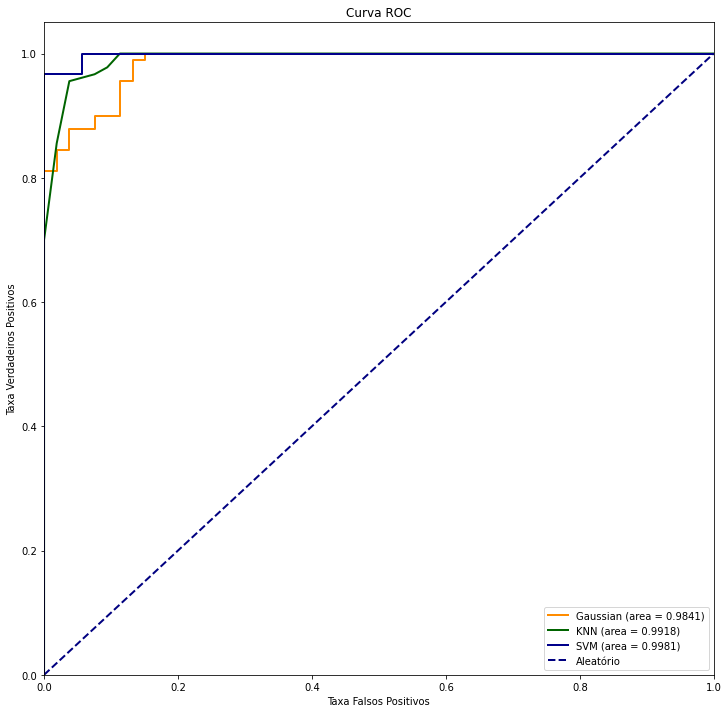

In [19]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(12,12))
lw = 2

y_score = melhor_gaussiannb.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
roc_auc = best_roc_aucs.loc["GaussianNB"]
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='Gaussian (area = %0.4f)' % roc_auc)

y_score = melhor_KNN.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
roc_auc = best_roc_aucs.loc["KNN"]
plt.plot(fpr, tpr, color='darkgreen', lw=lw, label='KNN (area = %0.4f)' % roc_auc)

y_score = melhor_svm.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
roc_auc = best_roc_aucs.loc["SVM"]
plt.plot(fpr, tpr, color='darkblue', lw=lw, label='SVM (area = %0.4f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Aleatório')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa Falsos Positivos')
plt.ylabel('Taxa Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

Portanto, segundo a métrica de ROC Auc, o melhor modelo é o SVM com kernel=rbf e gamma = auto